<a href="https://colab.research.google.com/github/lu-sketch/Chocolate-Imports-dataset/blob/main/L3T20_LJordaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get and explore dataset

In [36]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
import sklearn
from sklearn.model_selection import train_test_split

%matplotlib inline

In [37]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [38]:
negative_file = "/content/drive/MyDrive/DATA/LEVEL 3/Task 20/negative.txt"
positive_file = "/content/drive/MyDrive/DATA/LEVEL 3/Task 20/positive.txt"

In [39]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [42]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

Mean of the labels  0.5
Standard Deviation  0.5
Unique words in the data set:  1793 words


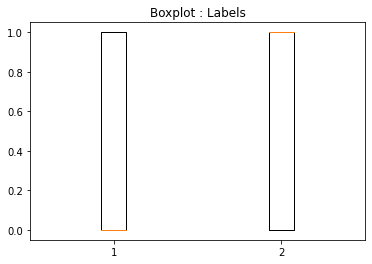

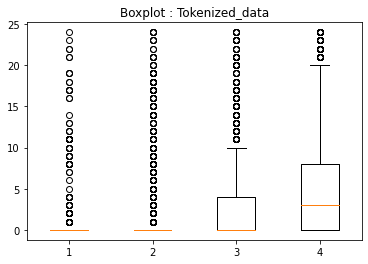

In [43]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.

print('Mean of the labels ',labels.mean())
print('Standard Deviation ',labels.std())

# Boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot : Labels')
ax1.boxplot(labels)

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot : Tokenized_data')
ax1.boxplot(tokenized_data)

# - Calculate the number of unique words in the dataset
print('Unique words in the data set: ', len(labels), 'words')

# - Perform any other dataset investigation that you feel would be valuable
 

Mean = 0.5 'Thus half of the words are positive and the other half negative'.

In [44]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])
print(len(tokenized_data))

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]
1793


# Pre-processing

In [45]:
# Write some code to pre-process the data so that each review is the same length
import tensorflow as tf
from keras_preprocessing.sequence import pad_sequences
tokenized_data = tf.keras.preprocessing.sequence.pad_sequences(tokenized_data,maxlen=4)
print(tokenized_data) # we have 1793 4 word sequences now


[[18  4  2 19]
 [ 0  2  4  2]
 [ 0  0  0  0]
 ...
 [ 0  0  0  0]
 [ 0  0  0  6]
 [ 0  0  0  0]]


In [46]:
X = tokenized_data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train, X_test', X_train.shape, X_test.shape)
print('y_train, y_test', y_train.shape, y_test.shape)


X_train, X_test (1434, 4) (359, 4)
y_train, y_test (1434, 2) (359, 2)


In [47]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.models import Sequential
from keras import layers

embedding_dim = 100
maxlen= 4 
model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model1.add(layers.Flatten())
model1.add(layers.Dense(2, activation='softmax'))
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 100)            256000    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 802       
                                                                 
Total params: 256,802
Trainable params: 256,802
Non-trainable params: 0
_________________________________________________________________


# Build and tune model

Define network architecture

Train model

In [48]:
epochs = 10
batch_size = 10
validation = 0.2
verbose = 2

In [49]:
print('Train Model 1')

history = model1.fit(X_train,
                      y_train,
                      batch_size=batch_size,
                      epochs=10,
                      validation_split=0.2)

Train Model 1
Epoch 1/10
115/115 [==============================] - 1s 4ms/step - loss: 0.6871 - accuracy: 0.5536 - val_loss: 0.6862 - val_accuracy: 0.5331
Epoch 2/10
115/115 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.6190 - val_loss: 0.6788 - val_accuracy: 0.5470
Epoch 3/10
115/115 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6364 - val_loss: 0.6734 - val_accuracy: 0.5470
Epoch 4/10
115/115 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.6356 - val_loss: 0.6738 - val_accuracy: 0.5889
Epoch 5/10
115/115 [==============================] - 2s 17ms/step - loss: 0.6342 - accuracy: 0.6452 - val_loss: 0.6766 - val_accuracy: 0.5784
Epoch 6/10
115/115 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.6469 - val_loss: 0.6900 - val_accuracy: 0.5679
Epoch 7/10
115/115 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.6486 - val_loss: 0.6875 - val_accuracy

In [50]:
def plot1(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    ## Accuracy plot
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    ## Loss plot
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()



Plot graphs for accuracy and loss

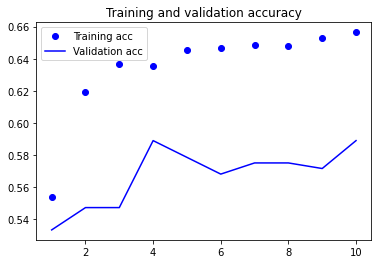

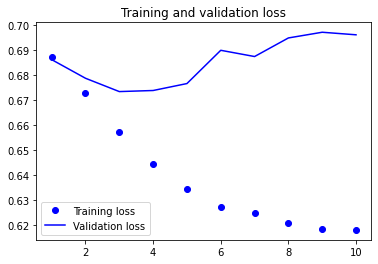

In [51]:
plot1(history)

Examine performance of model

In [52]:
# Model 1 Evaluation

print('Evaluate Model 1 Train data:')
loss, accuracy = model1.evaluate(X_train, y_train[:1434])

print('Evaluate Model 1 Test data:')
loss, accuracy = model1.evaluate(X_test, y_test[:359])



Evaluate Model 1 Train data:
45/45 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.6450
Evaluate Model 1 Test data:
12/12 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6323


In [53]:
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score,recall_score, f1_score

y_pred=model1.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

print('CONFUSTION MATRIX AND ACCURACY SCORES: MODEL 1')
print(metrics.classification_report(y_test,y_pred))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = '.2f')

12/12 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
# Model 2
from keras.layers import Dropout, LSTM
time_stamp = 10
model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model2.add(layers.SimpleRNN(10,activation='tanh',return_sequences=True))
model2.add(Dropout(0.2))
model2.add(layers.SimpleRNN(10,activation='tanh',return_sequences=True))
model2.add(Dropout(0.2))
model2.add(layers.LSTM(15,dropout=0.5))
model2.add(layers.Dense(2, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()


In [ ]:
epochs = 10
batch_size = 10
validation = 0.2
verbose = 2

In [ ]:
print('Train Model 2')

history = model2.fit(X_train,
                      y_train,
                      batch_size=batch_size,
                      epochs=10,
                      validation_split=(0.2))

In [ ]:
plot1(history)

In [ ]:
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score,recall_score, f1_score

y_pred=model2.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
rounded_predictions = model2.predict(test_images, batch_size=128, verbose=0)
rounded_predictions[1]
cm = confusion_matrix(y_test, y_pred)

print('CONFUSTION MATRIX AND ACCURACY SCORES: MODEL 2')
print(metrics.classification_report(y_test,y_pred))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = '.2f')

# Make a prediction

In [55]:
# This is a very small set of completed new data to use to make predictions.

prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]

tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=maxlen)



print('Model 1 : Prediction')
sentiment = ['Negative','Positive']
sequence = tokenizer.texts_to_sequences(prediction_data)
test = pad_sequences(sequence, maxlen=maxlen)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]




Model 1 : Prediction
1/1 [==============================] - 0s 15ms/step


'Positive'

In [54]:
# Prediction Model 2
print('Model 2 : Prediction')
sentiment = ['Negative','Positive']
sequence = tokenizer.texts_to_sequences(prediction_data)
test = pad_sequences(sequence, maxlen=maxlen)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]


Model 2 : Prediction
1/1 [==============================] - 0s 18ms/step


'Positive'

# References:
1. https://www.kaggle.com/code/jannesklaas/17-nlp-and-word-embeddings
2. https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/dl-simple-case.html
3. https://realpython.com/python-keras-text-classification/
4. https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91
5. https://stackoverflow.com/questions/48851558/tensorflow-estimator-valueerror-logits-and-labels-must-have-the-same-shape
6.